In [1]:
import pandas as pd
import numpy as np
from  datetime import datetime, timedelta
import time
import matplotlib.pyplot as plt 
import matplotlib as mpl
%matplotlib inline
import plotly.express as px 
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from mpl_toolkits.mplot3d import Axes3D

In [2]:
stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
stroke.sample(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3536,15990,Male,65.00,1,0,Yes,Govt_job,Rural,189.88,34.0,never smoked,0
1792,71869,Female,24.00,0,0,No,Private,Rural,72.06,30.2,formerly smoked,0
1236,48073,Male,67.00,0,0,Yes,Govt_job,Rural,93.71,31.2,formerly smoked,0
4299,31642,Female,66.00,0,0,Yes,Self-employed,Rural,85.90,34.6,never smoked,0
2496,8646,Female,54.00,0,0,Yes,Private,Rural,97.47,26.7,never smoked,0
1056,58203,Male,9.00,0,0,No,children,Urban,97.84,23.3,Unknown,0
4896,53028,Female,39.00,0,0,Yes,Private,Rural,81.31,34.7,never smoked,0
1767,28500,Male,10.00,0,0,No,children,Urban,91.98,16.4,Unknown,0
3968,41500,Male,0.16,0,0,No,children,Rural,69.79,13.0,Unknown,0
4860,70396,Female,1.08,0,0,No,children,Urban,109.33,18.2,Unknown,0


### Data Preparation

In [4]:
# Caution: Genders are 3

stroke['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [5]:
# count how many Other we have

stroke[stroke['gender'] == 'Other'].count()

id                   1
gender               1
age                  1
hypertension         1
heart_disease        1
ever_married         1
work_type            1
Residence_type       1
avg_glucose_level    1
bmi                  1
smoking_status       1
stroke               1
dtype: int64

In [7]:
# to convert to int64 later

stroke['age'].unique()

array([6.70e+01, 6.10e+01, 8.00e+01, 4.90e+01, 7.90e+01, 8.10e+01,
       7.40e+01, 6.90e+01, 5.90e+01, 7.80e+01, 5.40e+01, 5.00e+01,
       6.40e+01, 7.50e+01, 6.00e+01, 5.70e+01, 7.10e+01, 5.20e+01,
       8.20e+01, 6.50e+01, 5.80e+01, 4.20e+01, 4.80e+01, 7.20e+01,
       6.30e+01, 7.60e+01, 3.90e+01, 7.70e+01, 7.30e+01, 5.60e+01,
       4.50e+01, 7.00e+01, 6.60e+01, 5.10e+01, 4.30e+01, 6.80e+01,
       4.70e+01, 5.30e+01, 3.80e+01, 5.50e+01, 1.32e+00, 4.60e+01,
       3.20e+01, 1.40e+01, 3.00e+00, 8.00e+00, 3.70e+01, 4.00e+01,
       3.50e+01, 2.00e+01, 4.40e+01, 2.50e+01, 2.70e+01, 2.30e+01,
       1.70e+01, 1.30e+01, 4.00e+00, 1.60e+01, 2.20e+01, 3.00e+01,
       2.90e+01, 1.10e+01, 2.10e+01, 1.80e+01, 3.30e+01, 2.40e+01,
       3.40e+01, 3.60e+01, 6.40e-01, 4.10e+01, 8.80e-01, 5.00e+00,
       2.60e+01, 3.10e+01, 7.00e+00, 1.20e+01, 6.20e+01, 2.00e+00,
       9.00e+00, 1.50e+01, 2.80e+01, 1.00e+01, 1.80e+00, 3.20e-01,
       1.08e+00, 1.90e+01, 6.00e+00, 1.16e+00, 1.00e+00, 1.40e

In [9]:
stroke['hypertension'].unique()

array([0, 1], dtype=int64)

In [10]:
stroke['heart_disease'].unique()

array([1, 0], dtype=int64)

In [11]:
stroke['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [12]:
# to convert children to Minors later

stroke['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [13]:
stroke['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [14]:
stroke['avg_glucose_level'].unique()

array([228.69, 202.21, 105.92, ...,  82.99, 166.29,  85.28])

In [15]:
# drop NaNs later  OR  fill NaNs with the mean of the other bmi values: df.bmi.fillna(df.bmi.mean(),inplace=True)


stroke['bmi'].unique()

array([36.6,  nan, 32.5, 34.4, 24. , 29. , 27.4, 22.8, 24.2, 29.7, 36.8,
       27.3, 28.2, 30.9, 37.5, 25.8, 37.8, 22.4, 48.9, 26.6, 27.2, 23.5,
       28.3, 44.2, 25.4, 22.2, 30.5, 26.5, 33.7, 23.1, 32. , 29.9, 23.9,
       28.5, 26.4, 20.2, 33.6, 38.6, 39.2, 27.7, 31.4, 36.5, 33.2, 32.8,
       40.4, 25.3, 30.2, 47.5, 20.3, 30. , 28.9, 28.1, 31.1, 21.7, 27. ,
       24.1, 45.9, 44.1, 22.9, 29.1, 32.3, 41.1, 25.6, 29.8, 26.3, 26.2,
       29.4, 24.4, 28. , 28.8, 34.6, 19.4, 30.3, 41.5, 22.6, 56.6, 27.1,
       31.3, 31. , 31.7, 35.8, 28.4, 20.1, 26.7, 38.7, 34.9, 25. , 23.8,
       21.8, 27.5, 24.6, 32.9, 26.1, 31.9, 34.1, 36.9, 37.3, 45.7, 34.2,
       23.6, 22.3, 37.1, 45. , 25.5, 30.8, 37.4, 34.5, 27.9, 29.5, 46. ,
       42.5, 35.5, 26.9, 45.5, 31.5, 33. , 23.4, 30.7, 20.5, 21.5, 40. ,
       28.6, 42.2, 29.6, 35.4, 16.9, 26.8, 39.3, 32.6, 35.9, 21.2, 42.4,
       40.5, 36.7, 29.3, 19.6, 18. , 17.6, 19.1, 50.1, 17.7, 54.6, 35. ,
       22. , 39.4, 19.7, 22.5, 25.2, 41.8, 60.9, 23

In [16]:
stroke['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [17]:
stroke['stroke'].unique()

array([1, 0], dtype=int64)

In [18]:
# count how many people with Stroke we have

stroke[stroke['stroke'] == 1].count()

id                   249
gender               249
age                  249
hypertension         249
heart_disease        249
ever_married         249
work_type            249
Residence_type       249
avg_glucose_level    249
bmi                  209
smoking_status       249
stroke               249
dtype: int64

In [19]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [20]:
stroke.shape

(5110, 12)

In [21]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [22]:
stroke.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [23]:
stroke.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [24]:
stroke.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

### Data Cleaning

In [148]:
# repalce children with Minors

stroke['work_type'] = stroke['work_type'].str.replace('children', 'Minors')

In [26]:
stroke.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4885,19165,Male,33.0,0,0,Yes,Private,Urban,83.12,23.4,Unknown,0
3211,28027,Female,42.0,0,0,Yes,Govt_job,Urban,83.70,20.6,never smoked,0
4331,49605,Male,63.0,0,0,Yes,Private,Urban,74.39,31.0,formerly smoked,0
1308,57668,Male,49.0,0,0,Yes,Govt_job,Urban,72.20,30.3,formerly smoked,0
3950,50810,Male,20.0,0,0,No,Private,Rural,64.60,27.3,Unknown,0
4455,53821,Male,18.0,0,0,No,Private,Rural,100.47,31.9,never smoked,0
4100,71298,Female,17.0,0,0,No,Private,Rural,109.39,26.3,never smoked,0
4618,72188,Male,33.0,0,0,No,Private,Urban,107.47,26.7,never smoked,0
2610,35022,Female,69.0,0,0,Yes,Private,Urban,111.48,37.0,smokes,0
4048,64433,Male,54.0,0,0,Yes,Private,Urban,247.97,36.1,formerly smoked,0


In [27]:
stroke['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'Minors', 'Never_worked'],
      dtype=object)

In [149]:
# convert column 'age' from float to int64

stroke['age'] = stroke['age'].astype('int64')

In [29]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   int64  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 479.2+ KB


In [30]:
stroke.tail(15)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5095,68598,Male,1,0,0,No,Minors,Rural,79.15,17.4,Unknown,0
5096,41512,Male,57,0,0,Yes,Govt_job,Rural,76.62,28.2,never smoked,0
5097,64520,Male,68,0,0,Yes,Self-employed,Urban,91.68,40.8,Unknown,0
5098,579,Male,9,0,0,No,Minors,Urban,71.88,17.5,Unknown,0
5099,7293,Male,40,0,0,Yes,Private,Rural,83.94,NaN,smokes,0
5100,68398,Male,82,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5101,36901,Female,45,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5102,45010,Female,57,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5103,22127,Female,18,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13,0,0,No,Minors,Rural,103.08,18.6,Unknown,0


In [150]:
# DROP the NaNs in column 'bmi' with resetting index after drop

stroke = stroke.dropna().reset_index(drop=True)

In [32]:
stroke.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,56669,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [33]:
stroke.tail(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4904,14180,Female,13,0,0,No,Minors,Rural,103.08,18.6,Unknown,0
4905,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4906,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4907,37544,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
4908,44679,Female,44,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [34]:
stroke.shape

(4909, 12)

In [35]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.854145,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.575986,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [36]:
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,56669,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4904,14180,Female,13,0,0,No,Minors,Rural,103.08,18.6,Unknown,0
4905,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4906,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4907,37544,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [151]:
# Create AGE GROUPS  

stroke['Age_Group'] = pd.cut(stroke['age'],bins = [0,18,29,40,51,62,75, float('inf')],
                                labels = ['0-17','18-28','29-39','40-50','51-61','62-75','Over 75'],
                                right = False)
Age_Group = stroke['Age_Group'].value_counts().sort_values(ascending = False)
Age_Group

51-61      862
0-17       836
40-50      786
29-39      680
62-75      668
18-28      598
Over 75    479
Name: Age_Group, dtype: int64

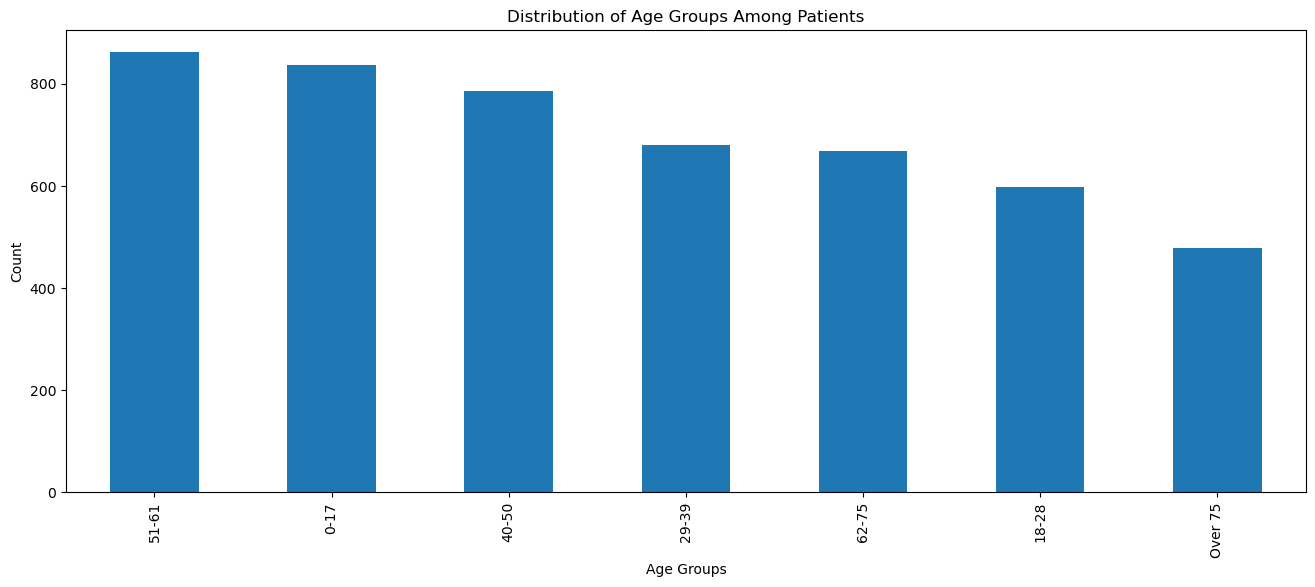

In [38]:
plt.figure(figsize=(16,6))
Age_Group.plot(kind = 'bar')
plt.title('Distribution of Age Groups Among Patients')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.show()

In [39]:
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Group
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,62-75
1,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Over 75
2,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,40-50
3,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Over 75
4,56669,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,Over 75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,14180,Female,13,0,0,No,Minors,Rural,103.08,18.6,Unknown,0,0-17
4905,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,Over 75
4906,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,29-39
4907,37544,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,51-61


In [40]:
stroke.shape

(4909, 13)

In [41]:
# checking how many under age 18 are not Minors (because this is not correct)

stroke[(stroke['age'] < 18) & (stroke['work_type'] != 'Minors')]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Group
211,16523,Female,8,0,0,No,Private,Urban,110.89,17.6,Unknown,0,0-17
213,46136,Male,14,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0,0-17
244,26325,Male,14,0,0,No,Govt_job,Urban,82.34,31.6,Unknown,0,0-17
248,70970,Female,17,0,0,No,Self-employed,Urban,82.18,23.4,Unknown,0,0-17
353,23462,Female,17,0,0,No,Private,Urban,87.52,39.2,never smoked,0,0-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4755,66650,Female,17,0,0,No,Private,Urban,68.86,41.1,never smoked,0,0-17
4786,61801,Male,15,0,0,No,Private,Urban,65.05,24.6,Unknown,0,0-17
4807,63158,Male,17,0,0,No,Private,Urban,63.28,40.2,Unknown,0,0-17
4808,27435,Female,17,0,0,No,Private,Urban,82.64,31.1,Unknown,0,0-17


In [152]:
# the whole df DOES NOT take the change with this code:

# stroke[(stroke['age'] < 18) & (stroke['work_type'] != 'Minors')].\
# replace({'Private', 'Govt_job','Self-employed', 'Never_worked'}, 'Minors')  

# we use .mask() with inplace = True instead:

stroke['work_type'].mask((stroke['age'] < 18) & (stroke['work_type'] != 'Minors'),'Minors', inplace=True)

In [153]:
stroke[(stroke['age'] < 18) & (stroke['work_type'] != 'Minors')]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Group


In [154]:
# ok change done! 
# check

stroke.iloc[211]

id                     16523
gender                Female
age                        8
hypertension               0
heart_disease              0
ever_married              No
work_type             Minors
Residence_type         Urban
avg_glucose_level     110.89
bmi                     17.6
smoking_status       Unknown
stroke                     0
Age_Group               0-17
Name: 211, dtype: object

In [45]:
# check

stroke.iloc[4879]

id                      8203
gender                  Male
age                       17
hypertension               0
heart_disease              0
ever_married              No
work_type             Minors
Residence_type         Rural
avg_glucose_level     106.56
bmi                     21.0
smoking_status       Unknown
stroke                     0
Age_Group               0-17
Name: 4879, dtype: object

In [46]:
# check

stroke.iloc[4755]

id                          66650
gender                     Female
age                            17
hypertension                    0
heart_disease                   0
ever_married                   No
work_type                  Minors
Residence_type              Urban
avg_glucose_level           68.86
bmi                          41.1
smoking_status       never smoked
stroke                          0
Age_Group                    0-17
Name: 4755, dtype: object

In [156]:
stroke.drop(['id'], axis=1, inplace=True)

In [48]:
stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Group
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,62-75
1,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Over 75
2,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,40-50
3,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Over 75
4,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,Over 75
...,...,...,...,...,...,...,...,...,...,...,...,...
4904,Female,13,0,0,No,Minors,Rural,103.08,18.6,Unknown,0,0-17
4905,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,Over 75
4906,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,29-39
4907,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,51-61


In [49]:
stroke.shape

(4909, 12)

In [50]:
# convert to .csv format   !! AGAIN before the final processing in Power Bi !!

# stroke.to_csv('StrokeData.csv', index=False)

In [51]:
# check how it appears after converting to csv

# stroke

In [52]:
# check for duplicates

# duplicate_values = stroke['id'].duplicated()

In [53]:
# duplicate_values

In [54]:
# READY for importing to Power Bi

### EDA

In [157]:
stroke[stroke['Age_Group'] == '0-17']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Group
206,Female,14,0,0,No,Minors,Rural,57.93,30.9,Unknown,1,0-17
209,Male,3,0,0,No,Minors,Rural,95.12,18.0,Unknown,0,0-17
211,Female,8,0,0,No,Minors,Urban,110.89,17.6,Unknown,0,0-17
213,Male,14,0,0,No,Minors,Rural,161.28,19.1,Unknown,0,0-17
242,Female,3,0,0,No,Minors,Urban,73.74,16.0,Unknown,0,0-17
...,...,...,...,...,...,...,...,...,...,...,...,...
4891,Female,0,0,0,No,Minors,Rural,62.13,16.8,Unknown,0,0-17
4895,Male,13,0,0,No,Minors,Urban,82.38,24.3,Unknown,0,0-17
4896,Male,1,0,0,No,Minors,Rural,79.15,17.4,Unknown,0,0-17
4899,Male,9,0,0,No,Minors,Urban,71.88,17.5,Unknown,0,0-17


In [134]:
stroke[(stroke['Age_Group'] == '0-17') & (stroke['stroke'] == 1)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Group
206,Female,14,0,0,No,Minors,Rural,57.93,30.9,Unknown,1,0-17


In [139]:
stroke[(stroke['Age_Group'] == '18-28') & (stroke['stroke'] == 0) & (stroke['hypertension'] == 1)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Group
666,Female,28,1,0,No,Private,Rural,80.40,57.5,never smoked,0,18-28
872,Female,23,1,0,No,Private,Urban,70.03,78.0,smokes,0,18-28
1472,Female,22,1,0,No,Private,Urban,71.22,40.0,never smoked,0,18-28
1653,Male,24,1,0,Yes,Private,Rural,80.63,28.2,smokes,0,18-28
1977,Female,24,1,0,No,Private,Urban,107.22,35.3,smokes,0,18-28
2270,Female,19,1,0,No,Private,Rural,65.96,29.0,never smoked,0,18-28
2812,Female,26,1,0,Yes,Private,Urban,107.59,33.1,smokes,0,18-28
3504,Female,28,1,0,Yes,Govt_job,Rural,83.66,36.4,never smoked,0,18-28
4739,Male,28,1,0,No,Private,Urban,86.61,38.6,smokes,0,18-28


In [144]:
stroke[(stroke['Age_Group'] == '0-17') & (stroke['stroke'] == 0) & (stroke['heart_disease'] ==1)].count()

gender               1
age                  1
hypertension         1
heart_disease        1
ever_married         1
work_type            1
Residence_type       1
avg_glucose_level    1
bmi                  1
smoking_status       1
stroke               1
Age_Group            1
dtype: int64

In [145]:
stroke[(stroke['Age_Group'] == '0-17') & (stroke['stroke'] == 0) & (stroke['hypertension'] ==1)].count()

gender               1
age                  1
hypertension         1
heart_disease        1
ever_married         1
work_type            1
Residence_type       1
avg_glucose_level    1
bmi                  1
smoking_status       1
stroke               1
Age_Group            1
dtype: int64

In [56]:
stroke[(stroke['age'] >= 65 ) & (stroke['age'] <= 75)].count()

gender               522
age                  522
hypertension         522
heart_disease        522
ever_married         522
work_type            522
Residence_type       522
avg_glucose_level    522
bmi                  522
smoking_status       522
stroke               522
Age_Group            522
dtype: int64

In [57]:
stroke[(stroke['age'] >= 75)].count()

gender               479
age                  479
hypertension         479
heart_disease        479
ever_married         479
work_type            479
Residence_type       479
avg_glucose_level    479
bmi                  479
smoking_status       479
stroke               479
Age_Group            479
dtype: int64

#### Checking stroke incidents

In [58]:
# CHECKING STROKE = 1 IN OUR TOTAL DATASET

In [59]:
# 209 people out of 4909

stroke[(stroke['stroke'] == 1)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Group
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,62-75
1,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Over 75
2,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,40-50
3,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Over 75
4,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,Over 75
...,...,...,...,...,...,...,...,...,...,...,...,...
204,Female,68,1,1,Yes,Private,Urban,247.51,40.5,formerly smoked,1,62-75
205,Male,57,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1,51-61
206,Female,14,0,0,No,Minors,Rural,57.93,30.9,Unknown,1,0-17
207,Female,75,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1,Over 75


In [60]:
# 110 people with stroke > = 70

stroke[(stroke['stroke'] == 1) & (stroke['age'] >= 70)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Group
1,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Over 75
3,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Over 75
4,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,Over 75
5,Male,74,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1,62-75
7,Female,78,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1,Over 75
...,...,...,...,...,...,...,...,...,...,...,...,...
194,Female,77,1,0,Yes,Self-employed,Urban,199.84,28.0,formerly smoked,1,Over 75
195,Male,78,0,0,Yes,Self-employed,Urban,218.46,26.8,Unknown,1,Over 75
198,Male,77,0,0,Yes,Self-employed,Rural,162.14,32.6,formerly smoked,1,Over 75
207,Female,75,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1,Over 75


In [61]:
stroke[(stroke['hypertension'] == 1) & (stroke['smoking_status'] == 'never smoked')].count()

gender               216
age                  216
hypertension         216
heart_disease        216
ever_married         216
work_type            216
Residence_type       216
avg_glucose_level    216
bmi                  216
smoking_status       216
stroke               216
Age_Group            216
dtype: int64

#### Checking STROKE = 1 AND SMOKING

In [62]:
# 57 people

stroke[(stroke['stroke'] == 1) & (stroke['smoking_status'] == 'formerly smoked')].shape

(57, 12)

In [63]:
# 39 people

stroke[(stroke['stroke'] == 1) & (stroke['smoking_status'] == 'smokes')].shape

(39, 12)

In [64]:
# CHECKING STROKE = 1 AND HYPERTENSION

In [65]:
# 60 people 
stroke[(stroke['stroke'] == 1) & (stroke['hypertension'] == 1)].shape

(60, 12)

In [66]:
# CHECKING STROKE = 1 AND HEART DISEASE

In [67]:
# 40 people

stroke[(stroke['stroke'] == 1) & (stroke['heart_disease'] == 1)].shape

(40, 12)

In [68]:
# CHECKING STROKE = 1 AND GENDER

In [69]:
#  120 people
stroke[(stroke['stroke'] == 1) & (stroke['gender'] == 'Female')].shape

(120, 12)

In [70]:
stroke[(stroke['stroke'] == 1) & (stroke['gender'] == 'Male')].shape

(89, 12)

In [71]:
stroke[(stroke['stroke'] == 1) & (stroke['age'] <= 20)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Group
206,Female,14,0,0,No,Minors,Rural,57.93,30.9,Unknown,1,0-17


In [72]:
stroke[(stroke['stroke'] == 1) & (stroke['age'] >= 40) & (stroke['age'] <=50)].count()

gender               15
age                  15
hypertension         15
heart_disease        15
ever_married         15
work_type            15
Residence_type       15
avg_glucose_level    15
bmi                  15
smoking_status       15
stroke               15
Age_Group            15
dtype: int64

In [73]:
stroke[(stroke['stroke'] == 1) & stroke['age'].isin(range(40, 51))].count()

gender               15
age                  15
hypertension         15
heart_disease        15
ever_married         15
work_type            15
Residence_type       15
avg_glucose_level    15
bmi                  15
smoking_status       15
stroke               15
Age_Group            15
dtype: int64

#### Checking other conditions

In [74]:
stroke[(stroke['age'] == 18) & (stroke['ever_married'] == 'Yes')]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Group
1108,Male,18,0,0,Yes,Private,Rural,140.52,27.4,never smoked,0,18-28


In [75]:
stroke[stroke['hypertension'] == 1].count()

gender               451
age                  451
hypertension         451
heart_disease        451
ever_married         451
work_type            451
Residence_type       451
avg_glucose_level    451
bmi                  451
smoking_status       451
stroke               451
Age_Group            451
dtype: int64

In [76]:
stroke[(stroke['stroke'] == 1) & (stroke['hypertension'] == 1) & (stroke['heart_disease'] == 1)].count()

gender               11
age                  11
hypertension         11
heart_disease        11
ever_married         11
work_type            11
Residence_type       11
avg_glucose_level    11
bmi                  11
smoking_status       11
stroke               11
Age_Group            11
dtype: int64

In [77]:
FiltStroke1 = stroke[(stroke['stroke'] == 1) & (stroke['hypertension'] == 1) & (stroke['heart_disease'] == 1)]
FiltStroke1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Group
5,Male,74,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1,62-75
29,Female,82,1,1,No,Private,Rural,84.03,26.5,formerly smoked,1,Over 75
96,Male,71,1,1,No,Govt_job,Rural,216.94,30.9,never smoked,1,62-75
120,Female,69,1,1,No,Self-employed,Urban,72.17,36.8,never smoked,1,62-75
150,Male,61,1,1,Yes,Private,Urban,112.24,37.4,smokes,1,51-61
153,Female,82,1,1,Yes,Govt_job,Urban,215.94,27.9,formerly smoked,1,Over 75
158,Male,68,1,1,Yes,Private,Rural,271.74,31.1,smokes,1,62-75
164,Male,80,1,1,Yes,Private,Urban,175.29,31.5,formerly smoked,1,Over 75
180,Female,55,1,1,Yes,Private,Urban,210.40,40.0,smokes,1,51-61
182,Male,81,1,1,Yes,Private,Urban,250.89,28.1,smokes,1,Over 75


In [78]:
# export to csv

# FiltStroke1.to_csv('Filter_StrokeData1.csv', index=False)

In [79]:
FiltStroke1[(FiltStroke1['age'] >=62) & (FiltStroke1['age'] <= 75)].count()

gender               5
age                  5
hypertension         5
heart_disease        5
ever_married         5
work_type            5
Residence_type       5
avg_glucose_level    5
bmi                  5
smoking_status       5
stroke               5
Age_Group            5
dtype: int64

In [80]:
stroke[stroke['heart_disease'] == 1].count()

gender               243
age                  243
hypertension         243
heart_disease        243
ever_married         243
work_type            243
Residence_type       243
avg_glucose_level    243
bmi                  243
smoking_status       243
stroke               243
Age_Group            243
dtype: int64

In [81]:
stroke[stroke['heart_disease'] == 0].count()

gender               4666
age                  4666
hypertension         4666
heart_disease        4666
ever_married         4666
work_type            4666
Residence_type       4666
avg_glucose_level    4666
bmi                  4666
smoking_status       4666
stroke               4666
Age_Group            4666
dtype: int64

#### Checking Smoking at ages <=15  

In [82]:
stroke[(stroke['stroke'] == 1) & (stroke['hypertension'] == 1) & (stroke['heart_disease'] == 1) & (stroke['smoking_status'] == 'smokes')].count()

gender               4
age                  4
hypertension         4
heart_disease        4
ever_married         4
work_type            4
Residence_type       4
avg_glucose_level    4
bmi                  4
smoking_status       4
stroke               4
Age_Group            4
dtype: int64

In [83]:
stroke[(stroke['age'] <= 15) & (stroke['smoking_status'] == 'smokes')]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Group
1005,Female,13,0,0,No,Minors,Rural,60.69,24.0,smokes,0,0-17
1433,Female,12,0,0,No,Minors,Rural,207.45,25.4,smokes,0,0-17
1908,Male,10,0,0,No,Minors,Urban,63.08,20.5,smokes,0,0-17


In [84]:
stroke[(stroke['age'] <= 15) & (stroke['smoking_status'] == 'formerly smoked')].shape

(18, 12)

In [85]:
stroke[(stroke['age'] <= 15)].shape

(727, 12)

In [86]:
stroke['age'].max()

82

In [87]:
stroke['age'].min()

0

In [88]:
stroke[(stroke['age'] >= 62) & (stroke['age'] < 75)].count()

gender               668
age                  668
hypertension         668
heart_disease        668
ever_married         668
work_type            668
Residence_type       668
avg_glucose_level    668
bmi                  668
smoking_status       668
stroke               668
Age_Group            668
dtype: int64

In [89]:
stroke[(stroke['age'] >= 62) & (stroke['age'] < 75) & (stroke['hypertension'] == 1)] .count()

gender               135
age                  135
hypertension         135
heart_disease        135
ever_married         135
work_type            135
Residence_type       135
avg_glucose_level    135
bmi                  135
smoking_status       135
stroke               135
Age_Group            135
dtype: int64

In [90]:
stroke[(stroke['age'] >= 62) & (stroke['age'] < 75) & (stroke['hypertension'] == 1) & (stroke['heart_disease'] == 1)] .count()

gender               19
age                  19
hypertension         19
heart_disease        19
ever_married         19
work_type            19
Residence_type       19
avg_glucose_level    19
bmi                  19
smoking_status       19
stroke               19
Age_Group            19
dtype: int64

In [9]:
stroke[stroke[(stroke['age'] >= 62) & (stroke['age'] < 75) & (stroke['hypertension'] == 1) & (stroke['heart_disease'] == 1)]]

ValueError: Boolean array expected for the condition, not object

In [ ]:
stroke[(stroke['age'] >= 62) & (stroke['age'] < 75) & (stroke['hypertension'] == 1) & (stroke['heart_disease'] == 1)]

In [91]:
stroke[(stroke['stroke'] == 1) & (stroke['smoking_status'] == 'smokes')].shape

(39, 12)

In [92]:
stroke[(stroke['stroke'] == 1) & (stroke['smoking_status'] == 'never smoked')].shape

(84, 12)

In [93]:
stroke0 = stroke[stroke['stroke'] == 0]
stroke0

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Group
209,Male,3,0,0,No,Minors,Rural,95.12,18.0,Unknown,0,0-17
210,Male,58,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,51-61
211,Female,8,0,0,No,Minors,Urban,110.89,17.6,Unknown,0,0-17
212,Female,70,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,62-75
213,Male,14,0,0,No,Minors,Rural,161.28,19.1,Unknown,0,0-17
...,...,...,...,...,...,...,...,...,...,...,...,...
4904,Female,13,0,0,No,Minors,Rural,103.08,18.6,Unknown,0,0-17
4905,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,Over 75
4906,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,29-39
4907,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,51-61


In [94]:
stroke1 =  stroke[stroke['stroke'] == 1]
stroke1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Group
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,62-75
1,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Over 75
2,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,40-50
3,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Over 75
4,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,Over 75
...,...,...,...,...,...,...,...,...,...,...,...,...
204,Female,68,1,1,Yes,Private,Urban,247.51,40.5,formerly smoked,1,62-75
205,Male,57,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1,51-61
206,Female,14,0,0,No,Minors,Rural,57.93,30.9,Unknown,1,0-17
207,Female,75,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1,Over 75


In [95]:
# convert to .csv 

# stroke0.to_csv('stroke0.csv', index=False)

### Graphs

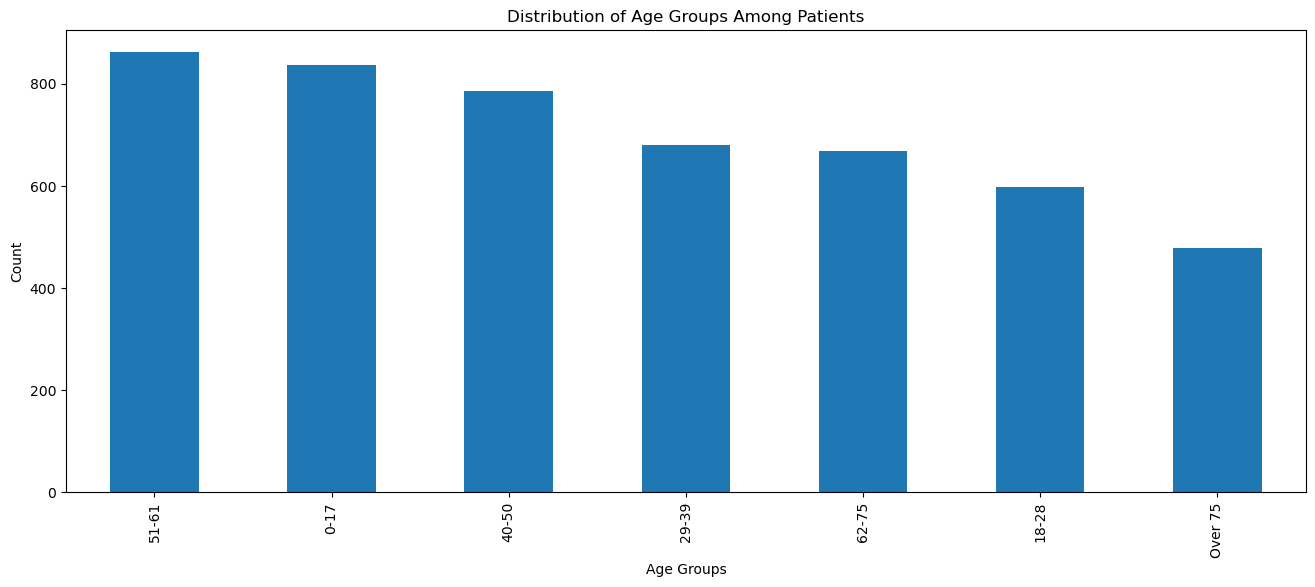

In [96]:
# histogram

plt.figure(figsize=(16,6))
Age_Group.plot(kind = 'bar')
plt.title('Distribution of Age Groups Among Patients')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.show()

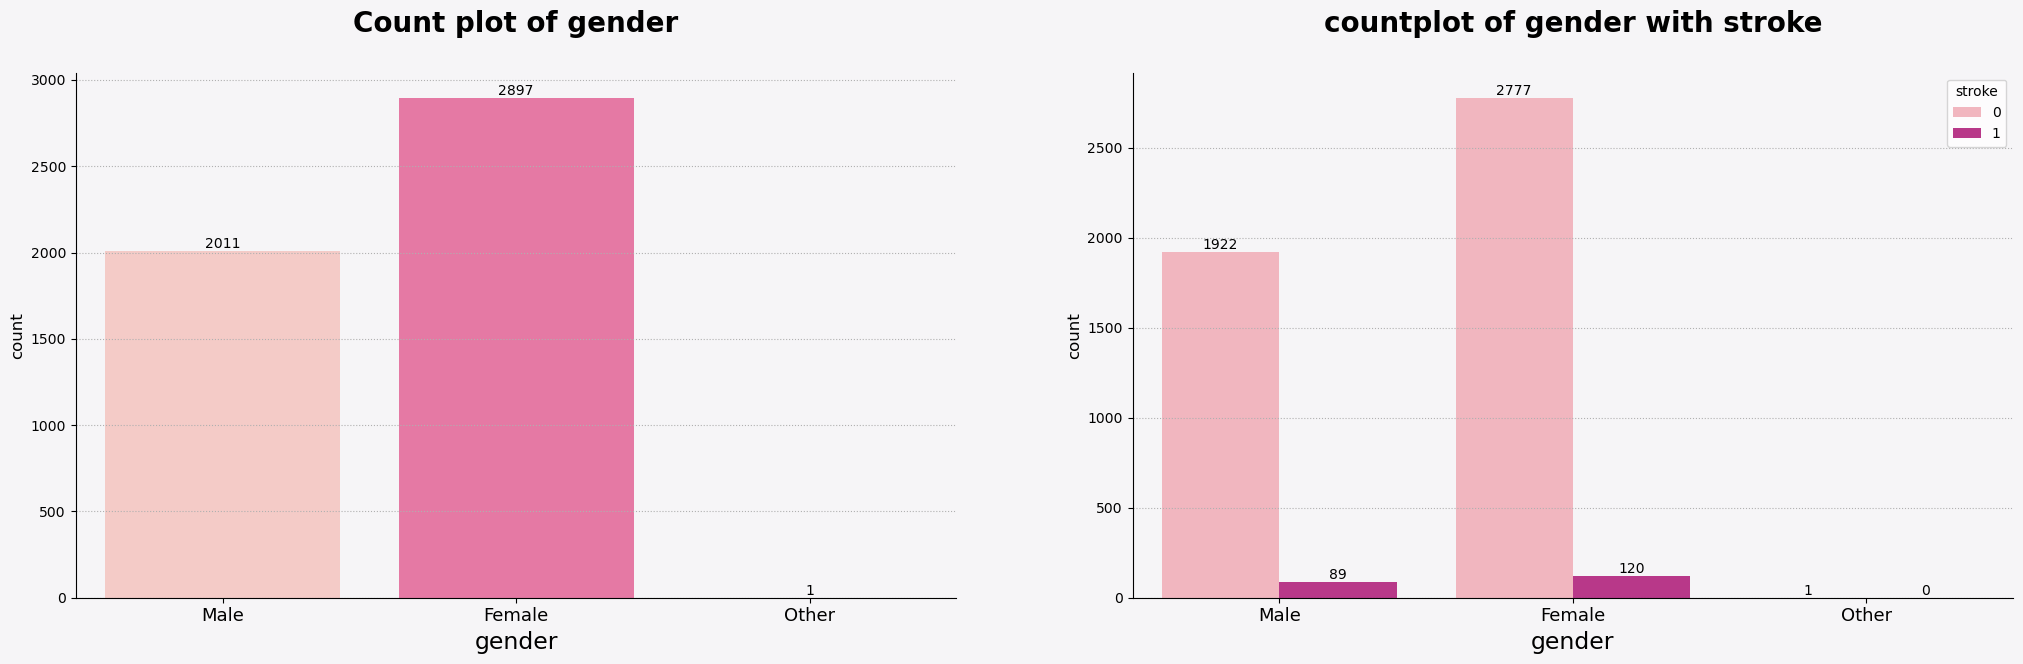

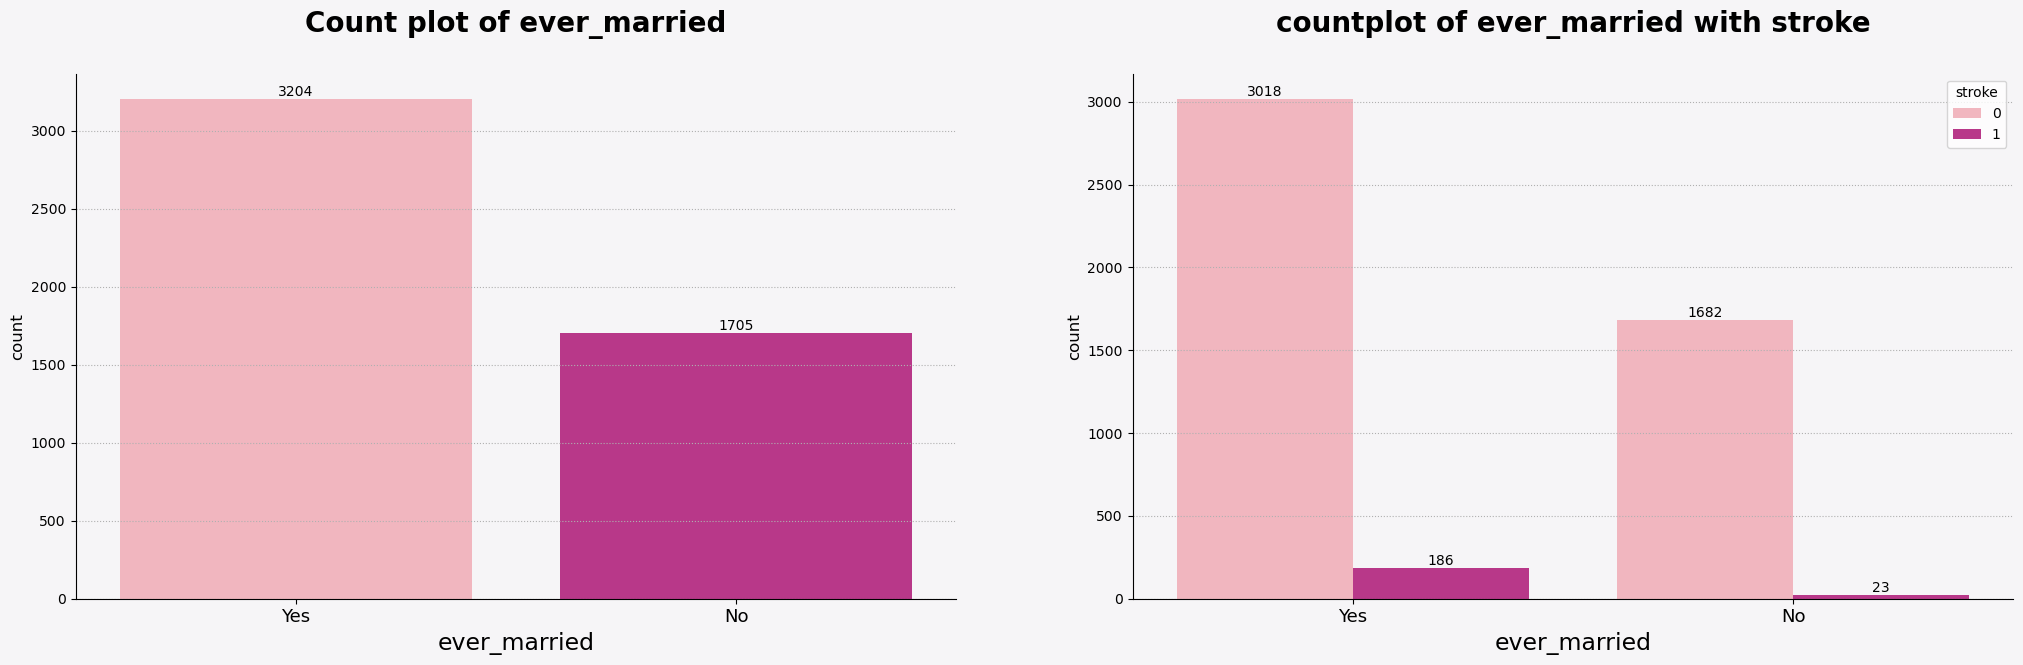

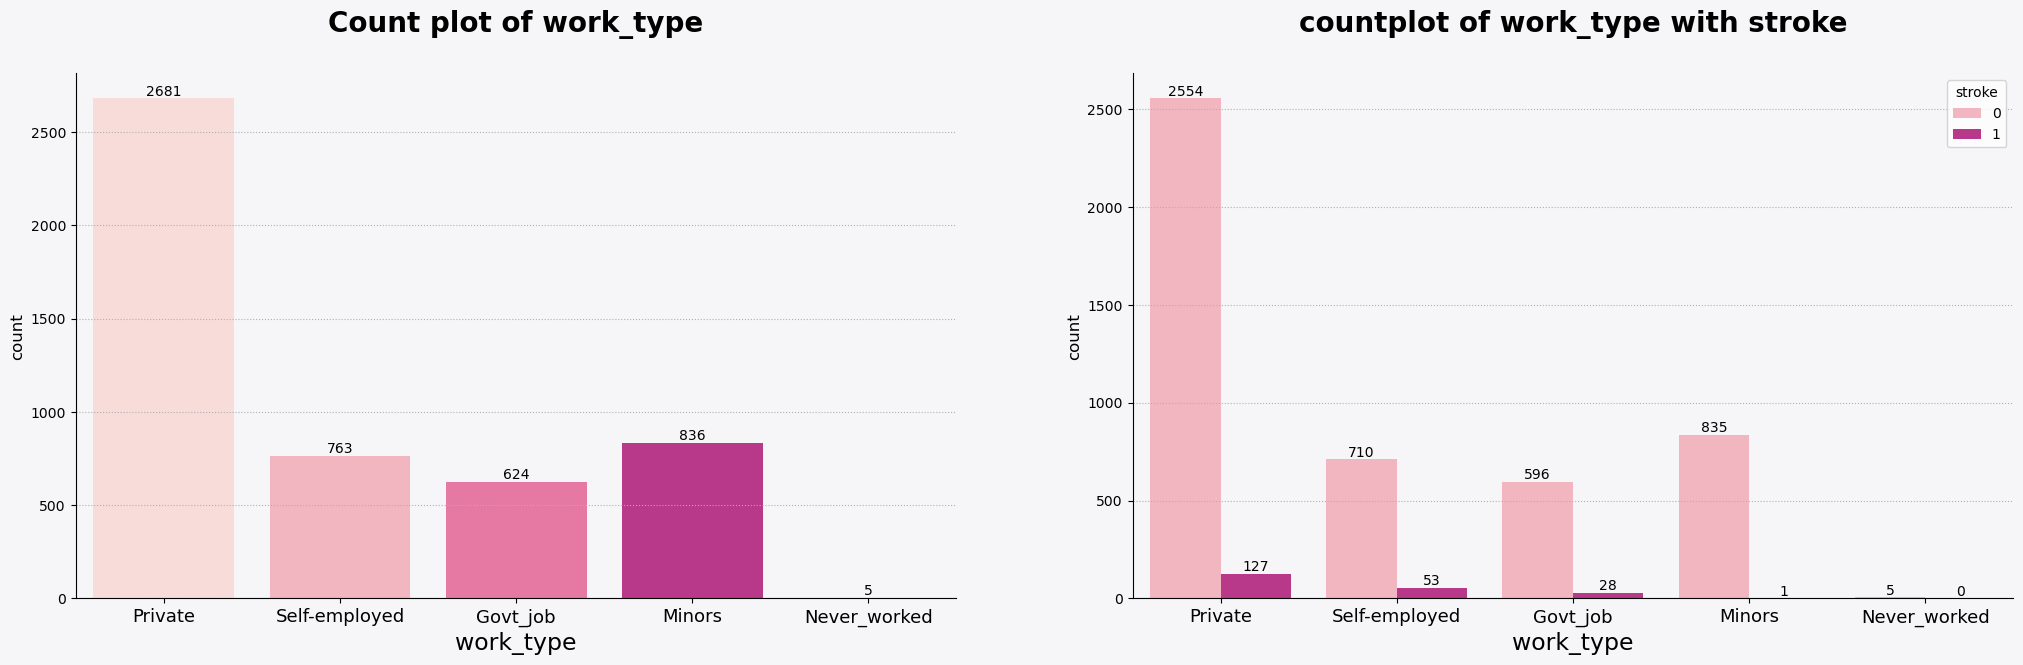

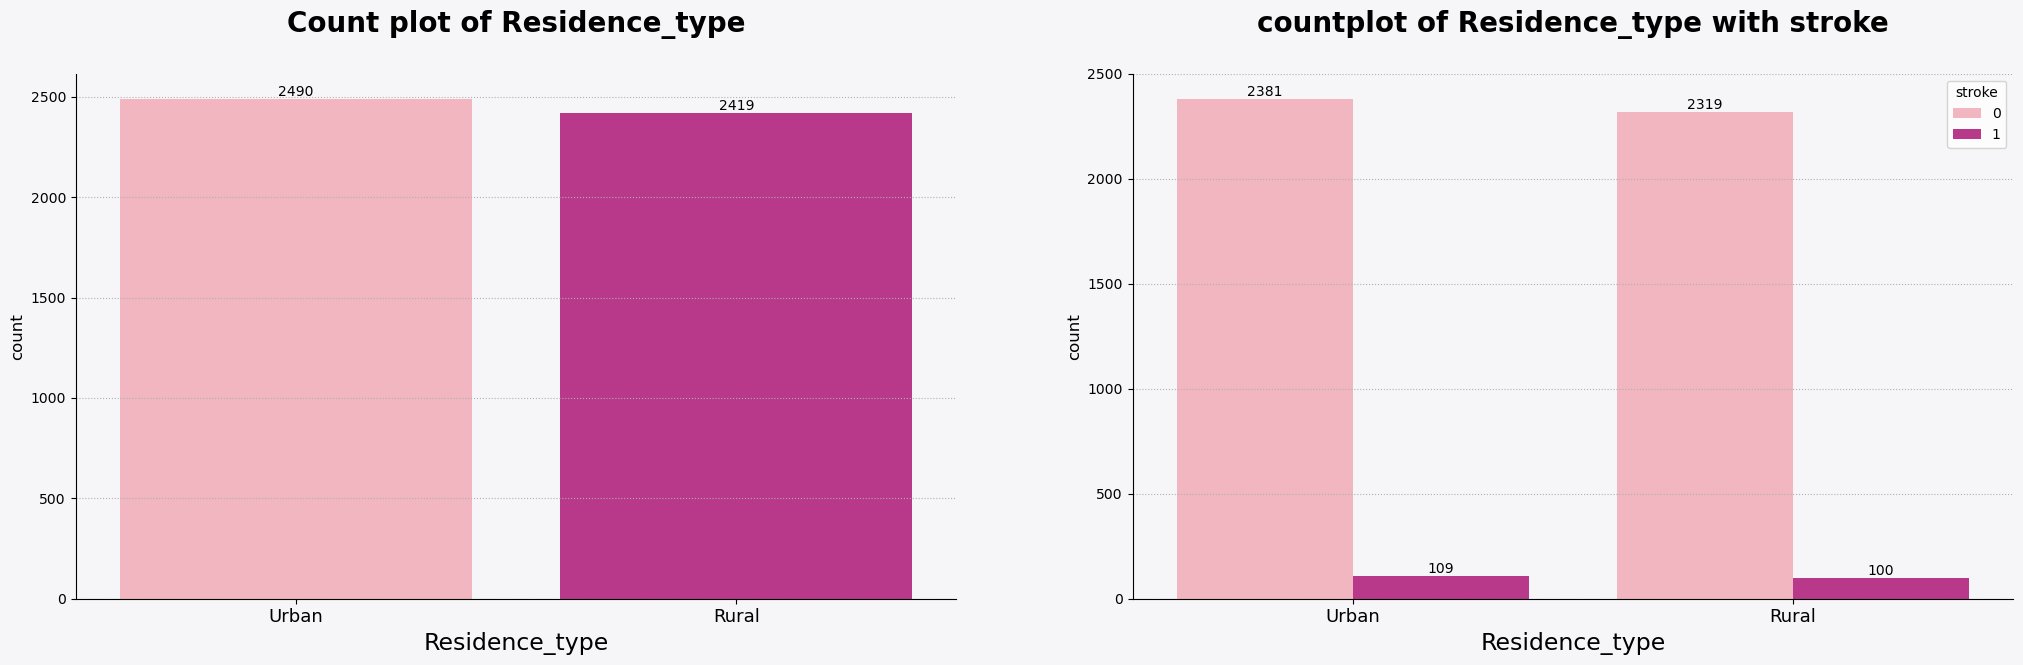

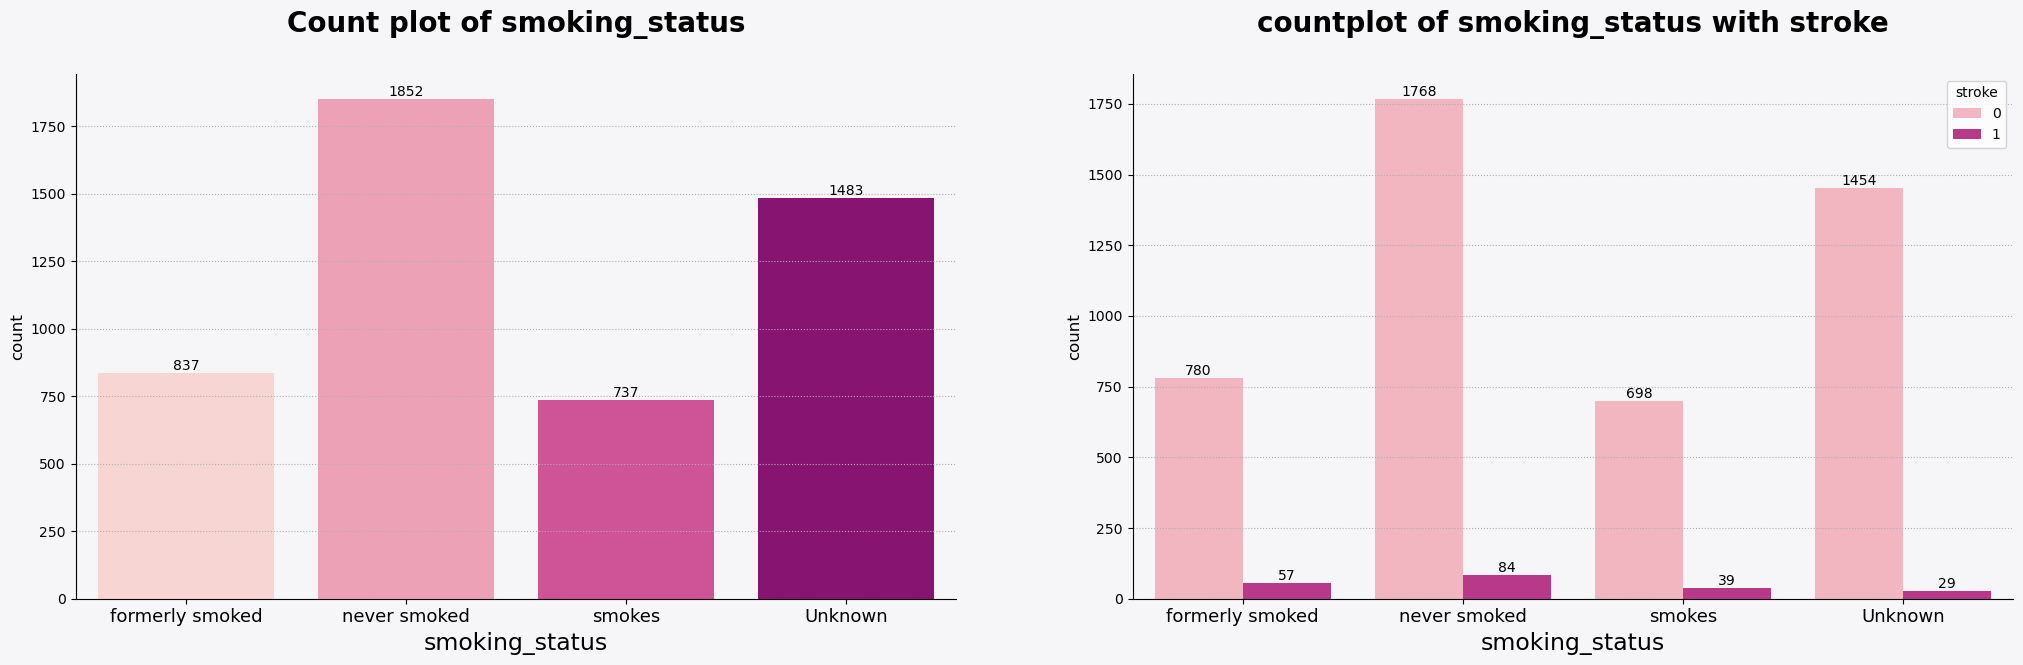

In [97]:
for i in stroke.columns:
    if stroke[i].dtype == "object":
        
        fig=plt.figure(figsize=(25,15))
        fig.patch.set_facecolor("#f6f5f7")
        
        xx=plt.subplot(2,2,1)
        xx.set_facecolor("#f6f5f7")
        x=sns.countplot(data=stroke, x=i,palette='RdPu')
        for container in x.containers:
            x.bar_label(container)
        plt.xticks(fontsize=13)
        plt.xlabel(i,fontsize=17)
        plt.ylabel("count",fontsize=12)
        plt.title(f"Count plot of {i}\n",fontsize=20,weight="bold")
        for x in ["top","right"]:
            xx.spines[x].set_visible(False)
        xx.grid(linestyle=':',axis='y')
        
    
    
        
        vv=plt.subplot(2,2,2)
        vv.set_facecolor("#f6f5f7")
        v=sns.countplot(data=stroke,x=i,hue="stroke",palette='RdPu')
        for container in v.containers:
            v.bar_label(container)
        plt.xticks(fontsize=13)
        plt.xlabel(i,fontsize=17)
        plt.ylabel("count",fontsize=12)
        plt.title(f"countplot of {i} with stroke\n",fontsize=20,weight="bold" )
        for v in ["top","right"]:
            vv.spines[v].set_visible(False)
        vv.grid(linestyle=':',axis='y')
        plt.show()

<Figure size 2000x1500 with 0 Axes>

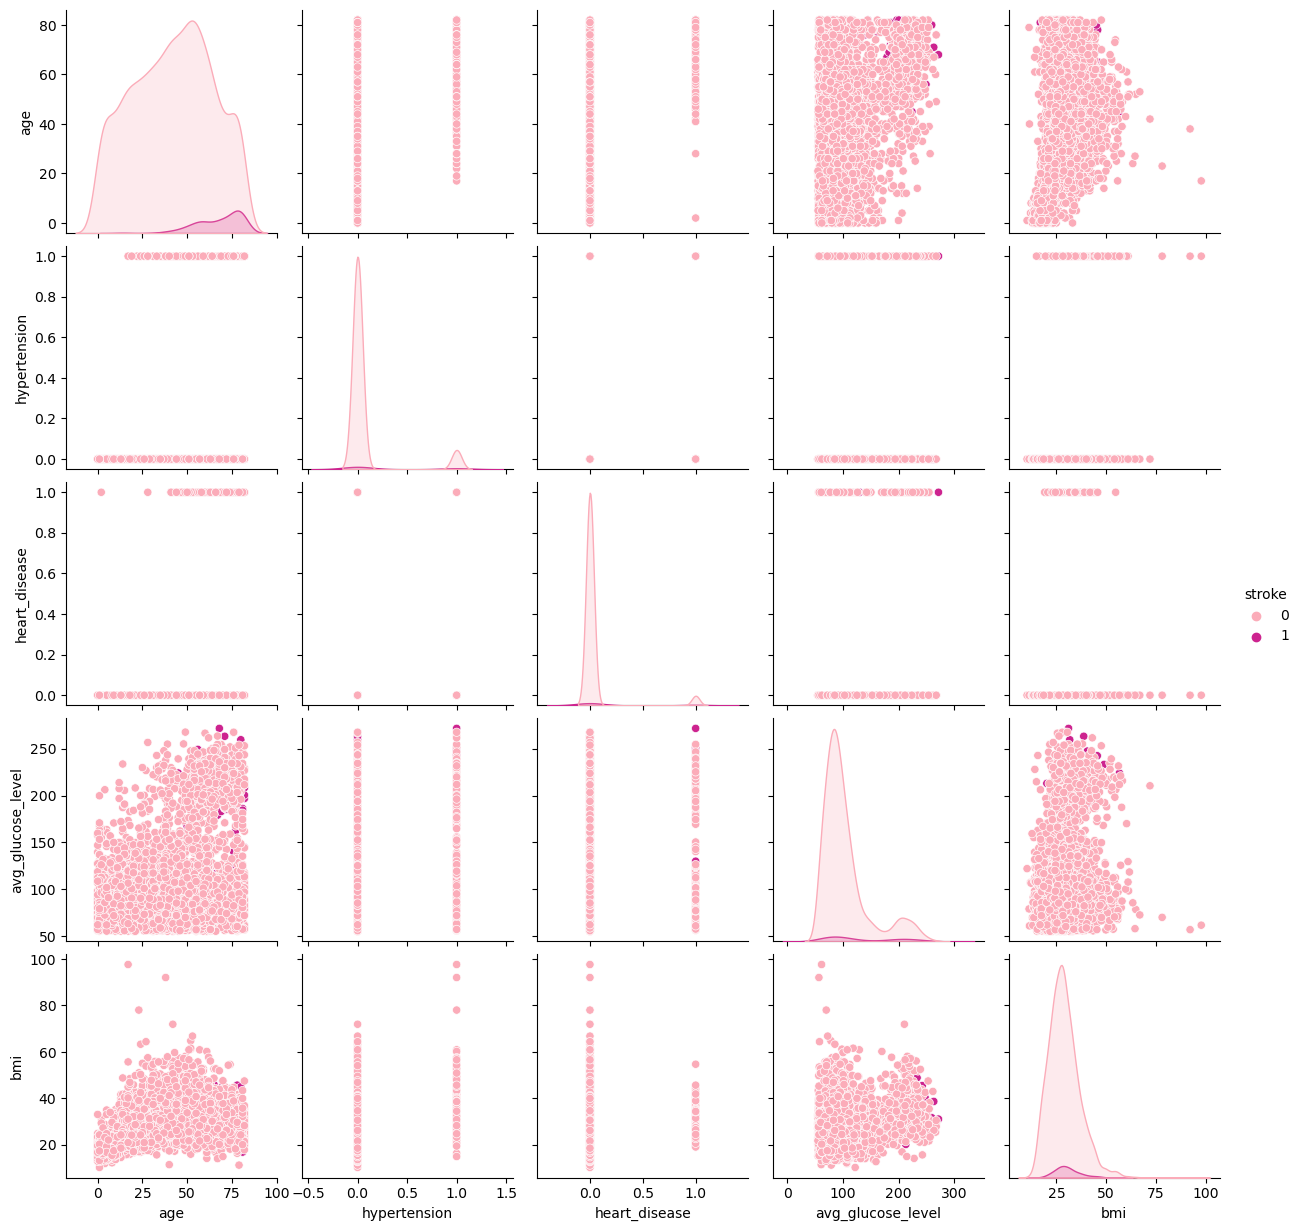

In [98]:
fig=plt.figure(figsize=(20,15),dpi=100)
sns.pairplot(stroke,hue="stroke",palette='RdPu')

In [99]:
# CORRELATION HEATMAP 
# we can see that age is mostly related with strokes in our sample

C:\Users\IRINI\AppData\Local\Temp\ipykernel_5800\1625215916.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  v=round(stroke.corr(),2)


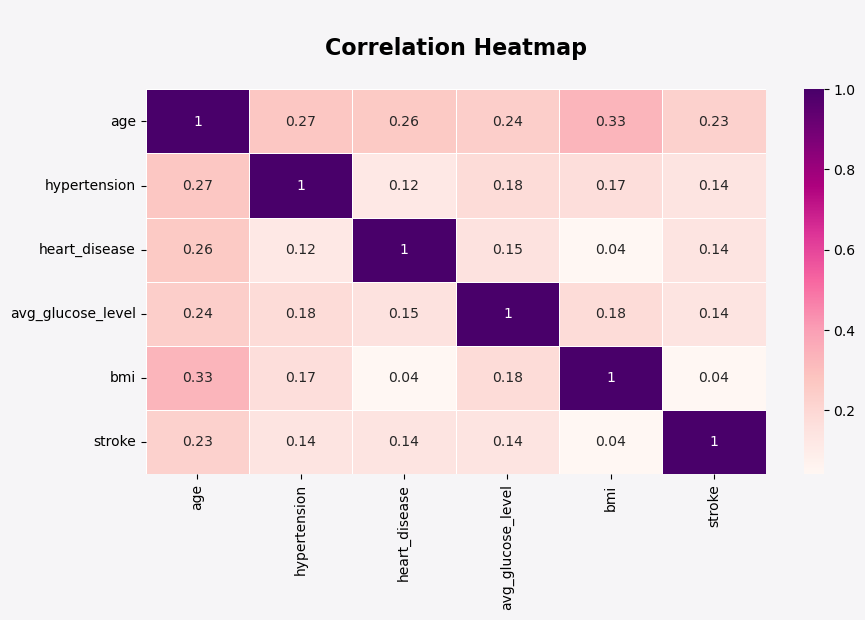

In [100]:
fig,x=plt.subplots(figsize=(10,5))
fig.patch.set_facecolor('#f6f5f7')
v=round(stroke.corr(),2)
sns.heatmap(v,annot=True,cmap="RdPu", linewidths=.5)
plt.title("\nCorrelation Heatmap\n", fontsize=16, weight="bold");

#### Distributions

In [101]:
dfnumerical=stroke[['age','avg_glucose_level','bmi']]
dfcategorical=stroke[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                       'smoking_status', 'stroke']]

C:\Users\IRINI\AppData\Local\Temp\ipykernel_5800\1043832286.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  vv=sns.histplot(data=dfnumerical,x=i,kde=True,palette='RdPu')
C:\Users\IRINI\AppData\Local\Temp\ipykernel_5800\1043832286.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ll=sns.lineplot(data=stroke, x=i, y="stroke",palette='RdPu')
C:\Users\IRINI\AppData\Local\Temp\ipykernel_5800\1043832286.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  vv=sns.histplot(data=dfnumerical,x=i,kde=True,palette='RdPu')
C:\Users\IRINI\AppData\Local\Temp\ipykernel_5800\1043832286.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ll=sns.lineplot(data=stroke, x=i, y="stroke",palette='RdPu')
C:\Users\IRINI\AppData\Local\Temp\ipykernel_5800\1043832286.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  vv=sns.histplot(data=dfnume

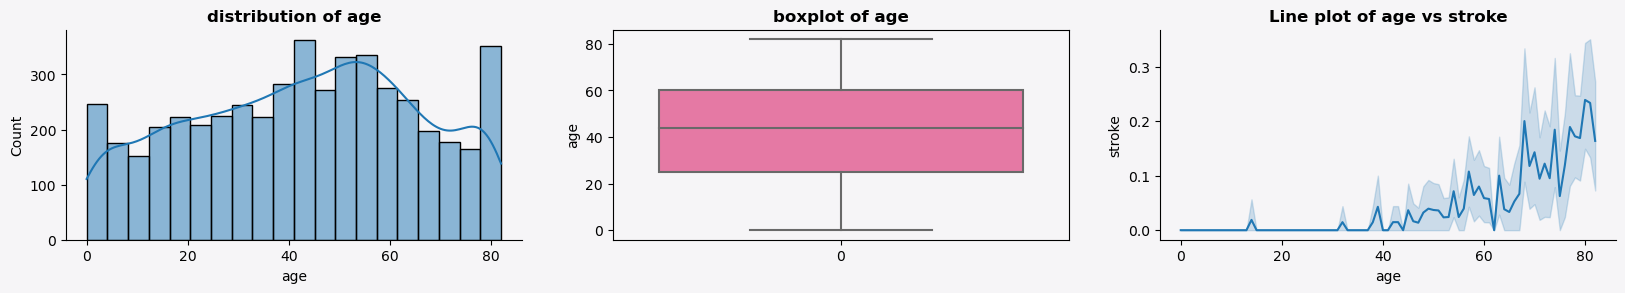

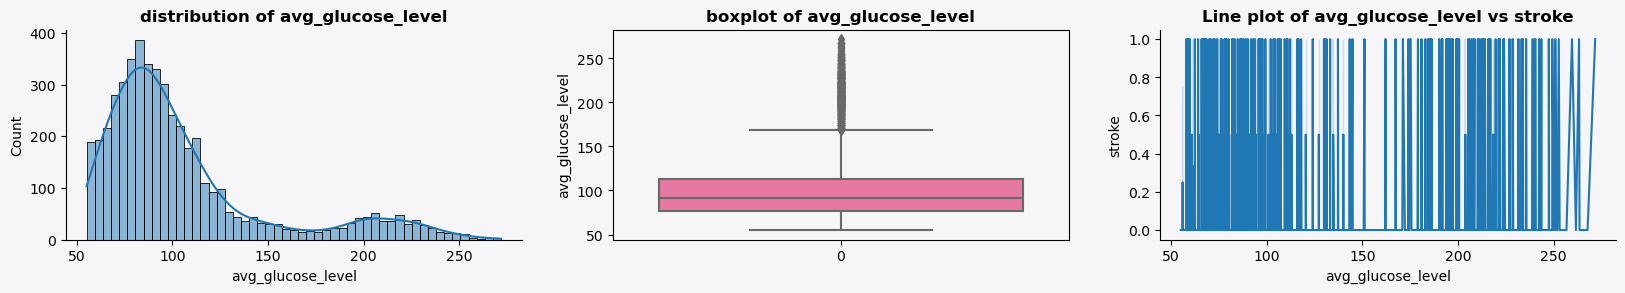

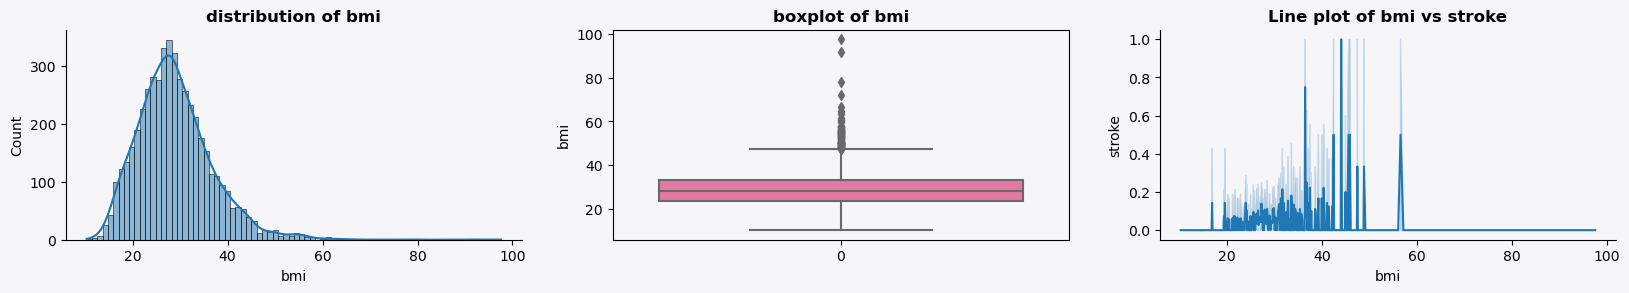

In [102]:
for i in dfnumerical:
    fig=plt.figure(figsize=(20,6))
    fig.patch.set_facecolor("#f6f5f7")
        
    v=plt.subplot(2,3,1)
    v.set_facecolor('#f6f5f7')
    vv=sns.histplot(data=dfnumerical,x=i,kde=True,palette='RdPu')
    plt.title(f"distribution of {i}",weight='bold')
    for vv in ["top","right"]:
        v.spines[vv].set_visible(False)
        
        
    b=plt.subplot(2,3,2) 
    b.set_facecolor("#f6f5f7")
    sns.boxplot(dfnumerical[i],palette='RdPu')
    plt.ylabel(i)
    plt.title(f"boxplot of {i}",weight='bold')
        
    l=plt.subplot(2,3,3)
    l.set_facecolor("#f6f5f7")
    ll=sns.lineplot(data=stroke, x=i, y="stroke",palette='RdPu')
    for ll in ["top","right"]:
        l.spines[ll].set_visible(False)
    plt.title(f"Line plot of {i} vs stroke",weight='bold')

In [103]:
stroke['age'].mode()

0    57
1    78
Name: age, dtype: int64

In [104]:
stroke['age'].mean()

42.85414544713791

In [105]:
stroke['bmi'].mode()

0    28.7
Name: bmi, dtype: float64

In [106]:
stroke['bmi'].mean()

28.893236911794663

In [107]:
stroke.sample(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Group
84,Female,77,0,0,Yes,Govt_job,Rural,190.32,31.4,never smoked,1,Over 75
3464,Male,0,0,0,No,Minors,Rural,114.54,15.1,Unknown,0,0-17
103,Male,80,0,0,Yes,Private,Rural,259.63,31.7,smokes,1,Over 75
785,Female,51,0,0,No,Private,Urban,110.76,24.7,formerly smoked,0,51-61
4347,Female,32,0,0,Yes,Private,Rural,66.30,47.5,never smoked,0,29-39


<Axes: xlabel='work_type', ylabel='bmi'>

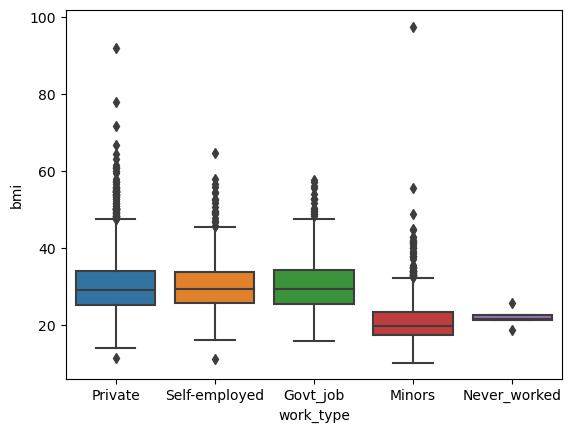

In [108]:
sns.boxplot(x=stroke['work_type'],y=stroke['bmi'])

<Axes: xlabel='age', ylabel='smoking_status'>

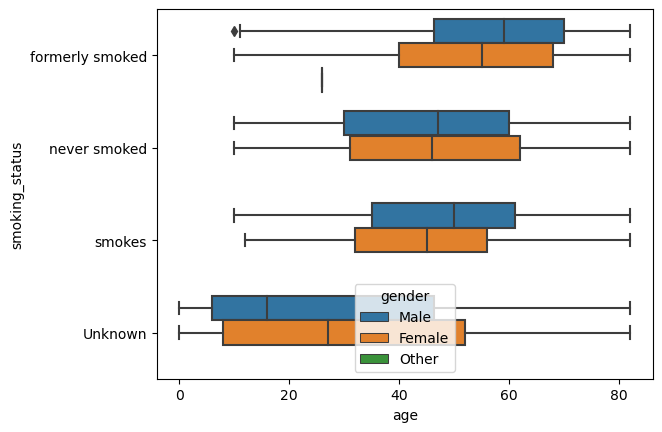

In [109]:
sns.boxplot(x="age", y="smoking_status", hue="gender", data=stroke)

<Axes: xlabel='work_type', ylabel='stroke'>

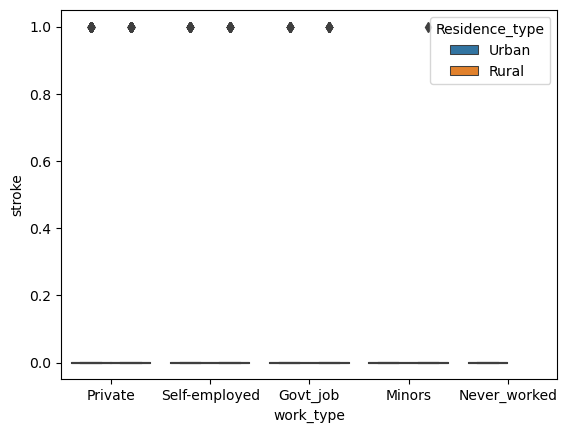

In [110]:
sns.boxplot(x="work_type", y="stroke", hue="Residence_type", data=stroke)

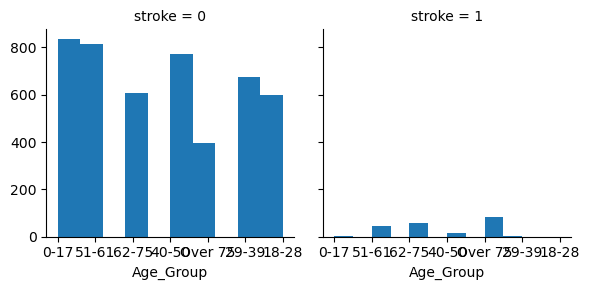

In [111]:
stroke2 = sns.FacetGrid(stroke,col='stroke') #break it for time
stroke2.map(plt.hist,'Age_Group') #make a histogram for tip (broken down by times)

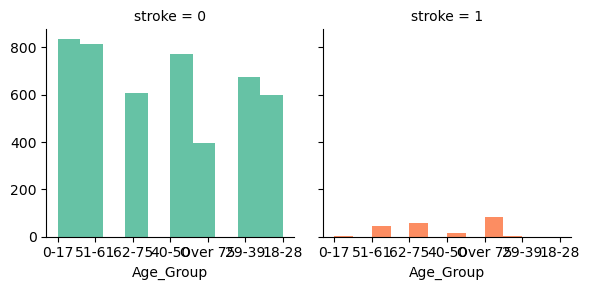

In [112]:
# or
stroke2 = sns.FacetGrid(stroke,col='stroke', hue = 'stroke', palette = 'Set2') 
stroke2.map(plt.hist,'Age_Group') 

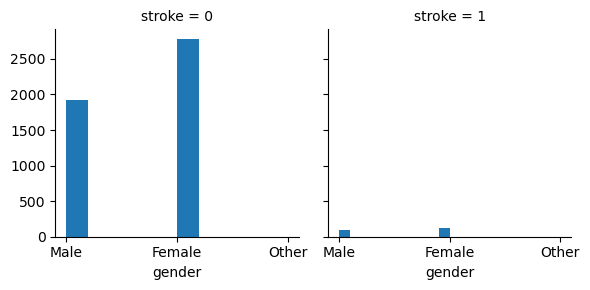

In [113]:
stroke2 = sns.FacetGrid(stroke,col='stroke')
stroke2.map(plt.hist,'gender') 

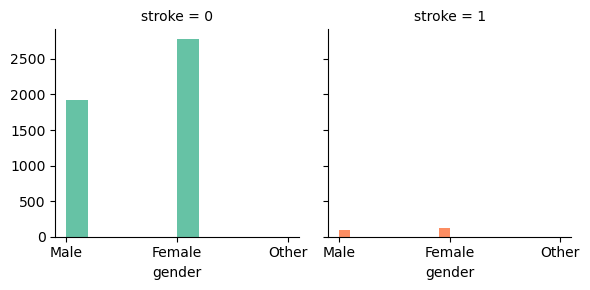

In [114]:
stroke2 = sns.FacetGrid(stroke,col='stroke', hue = 'stroke', palette = 'Set2')
stroke2.map(plt.hist,'gender') 

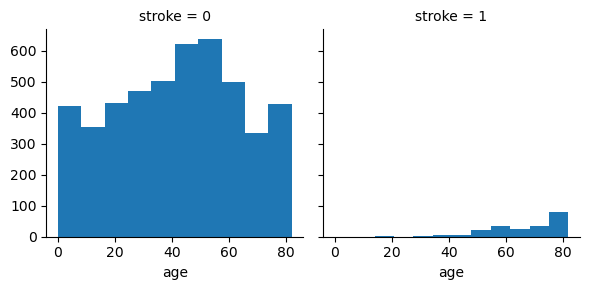

In [115]:
stroke2 = sns.FacetGrid(stroke,col='stroke', palette = 'Set2')
stroke2.map(plt.hist,'age') 

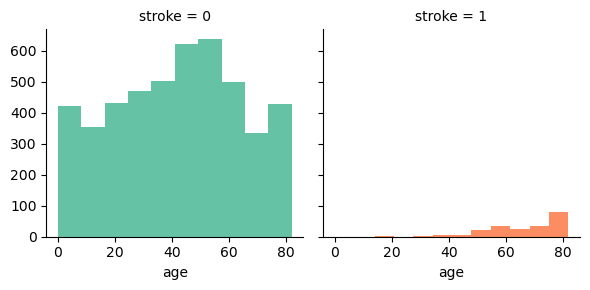

In [116]:
stroke2 = sns.FacetGrid(stroke,col='stroke', hue = 'stroke', palette = 'Set2')
stroke2.map(plt.hist,'age') 

In [117]:
stroke[(stroke['stroke'] == 1) & (stroke['age'] <18)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Group
206,Female,14,0,0,No,Minors,Rural,57.93,30.9,Unknown,1,0-17


In [118]:
stroke[(stroke['stroke'] == 1) & (stroke['heart_disease'] == 1) & (stroke['work_type'] == 'Private')].count()

gender               28
age                  28
hypertension         28
heart_disease        28
ever_married         28
work_type            28
Residence_type       28
avg_glucose_level    28
bmi                  28
smoking_status       28
stroke               28
Age_Group            28
dtype: int64

In [8]:
stroke[(stroke['stroke'] == 1) & (stroke['age'] == 78)].count()

id                   21
gender               21
age                  21
hypertension         21
heart_disease        21
ever_married         21
work_type            21
Residence_type       21
avg_glucose_level    21
bmi                  16
smoking_status       21
stroke               21
dtype: int64

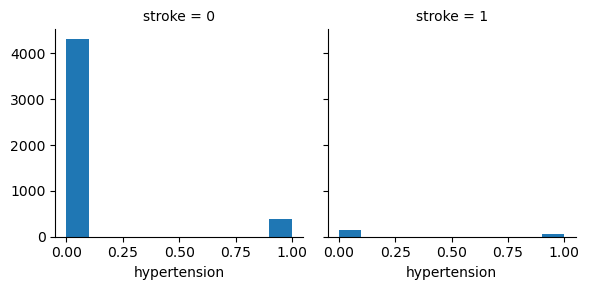

In [120]:
stroke2 = sns.FacetGrid(stroke,col='stroke')
stroke2.map(plt.hist,'hypertension') 

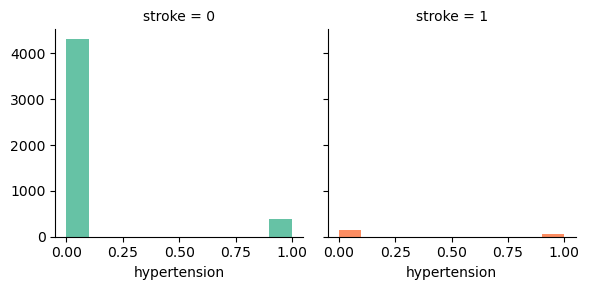

In [121]:
stroke2 = sns.FacetGrid(stroke,col='stroke', hue = 'stroke', palette = 'Set2')
stroke2.map(plt.hist,'hypertension')

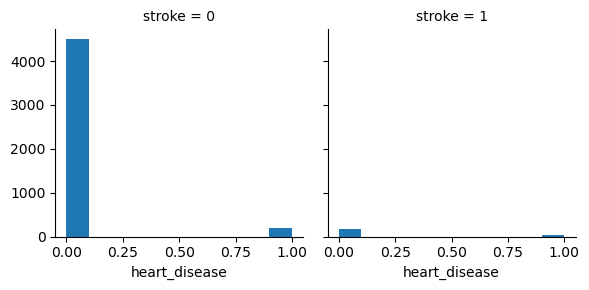

In [122]:
stroke2 = sns.FacetGrid(stroke,col='stroke')
stroke2.map(plt.hist,'heart_disease') 

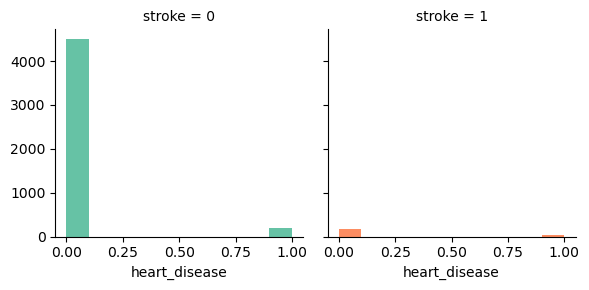

In [123]:
stroke2 = sns.FacetGrid(stroke,col='stroke', hue = 'stroke', palette = 'Set2')
stroke2.map(plt.hist,'heart_disease') 

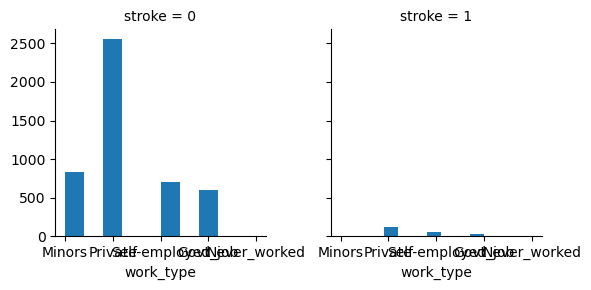

In [124]:
stroke2 = sns.FacetGrid(stroke,col='stroke')
stroke2.map(plt.hist,'work_type') 

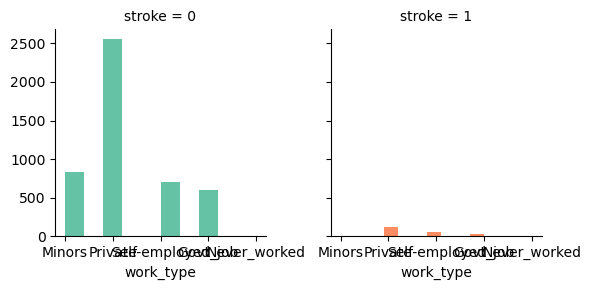

In [125]:
stroke2 = sns.FacetGrid(stroke,col='stroke', hue = 'stroke', palette = 'Set2')
stroke2.map(plt.hist,'work_type') 

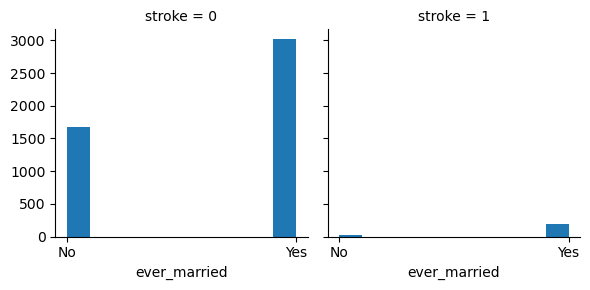

In [126]:
stroke2 = sns.FacetGrid(stroke,col='stroke')
stroke2.map(plt.hist,'ever_married') 

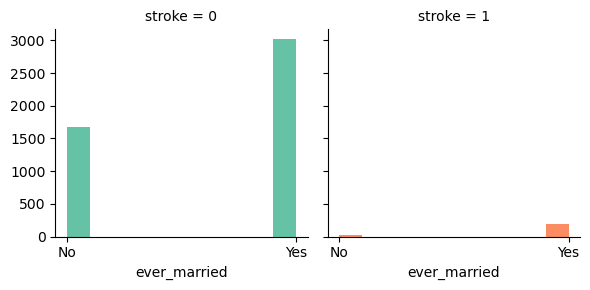

In [127]:
stroke2 = sns.FacetGrid(stroke,col='stroke', hue = 'stroke', palette = 'Set2')
stroke2.map(plt.hist,'ever_married') 

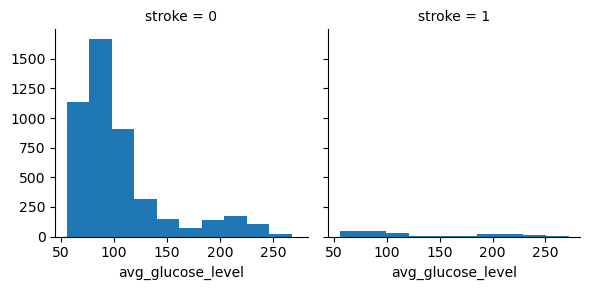

In [128]:
stroke2 = sns.FacetGrid(stroke,col='stroke')
stroke2.map(plt.hist,'avg_glucose_level') 

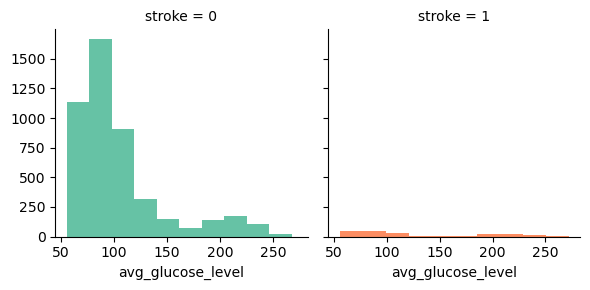

In [129]:
stroke2 = sns.FacetGrid(stroke,col='stroke', hue = 'stroke', palette = 'Set2')
stroke2.map(plt.hist,'avg_glucose_level') 

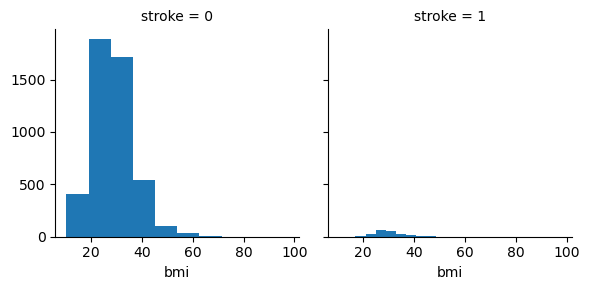

In [130]:
stroke2 = sns.FacetGrid(stroke,col='stroke')
stroke2.map(plt.hist,'bmi') 

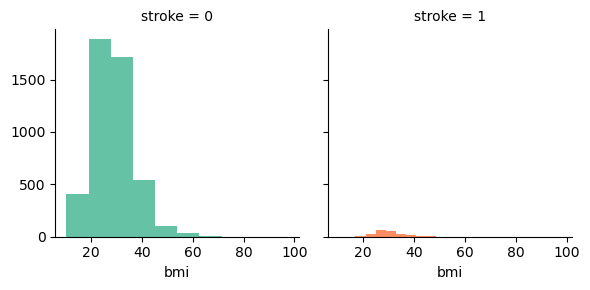

In [131]:
stroke2 = sns.FacetGrid(stroke,col='stroke', hue = 'stroke', palette = 'Set2')
stroke2.map(plt.hist,'bmi') 

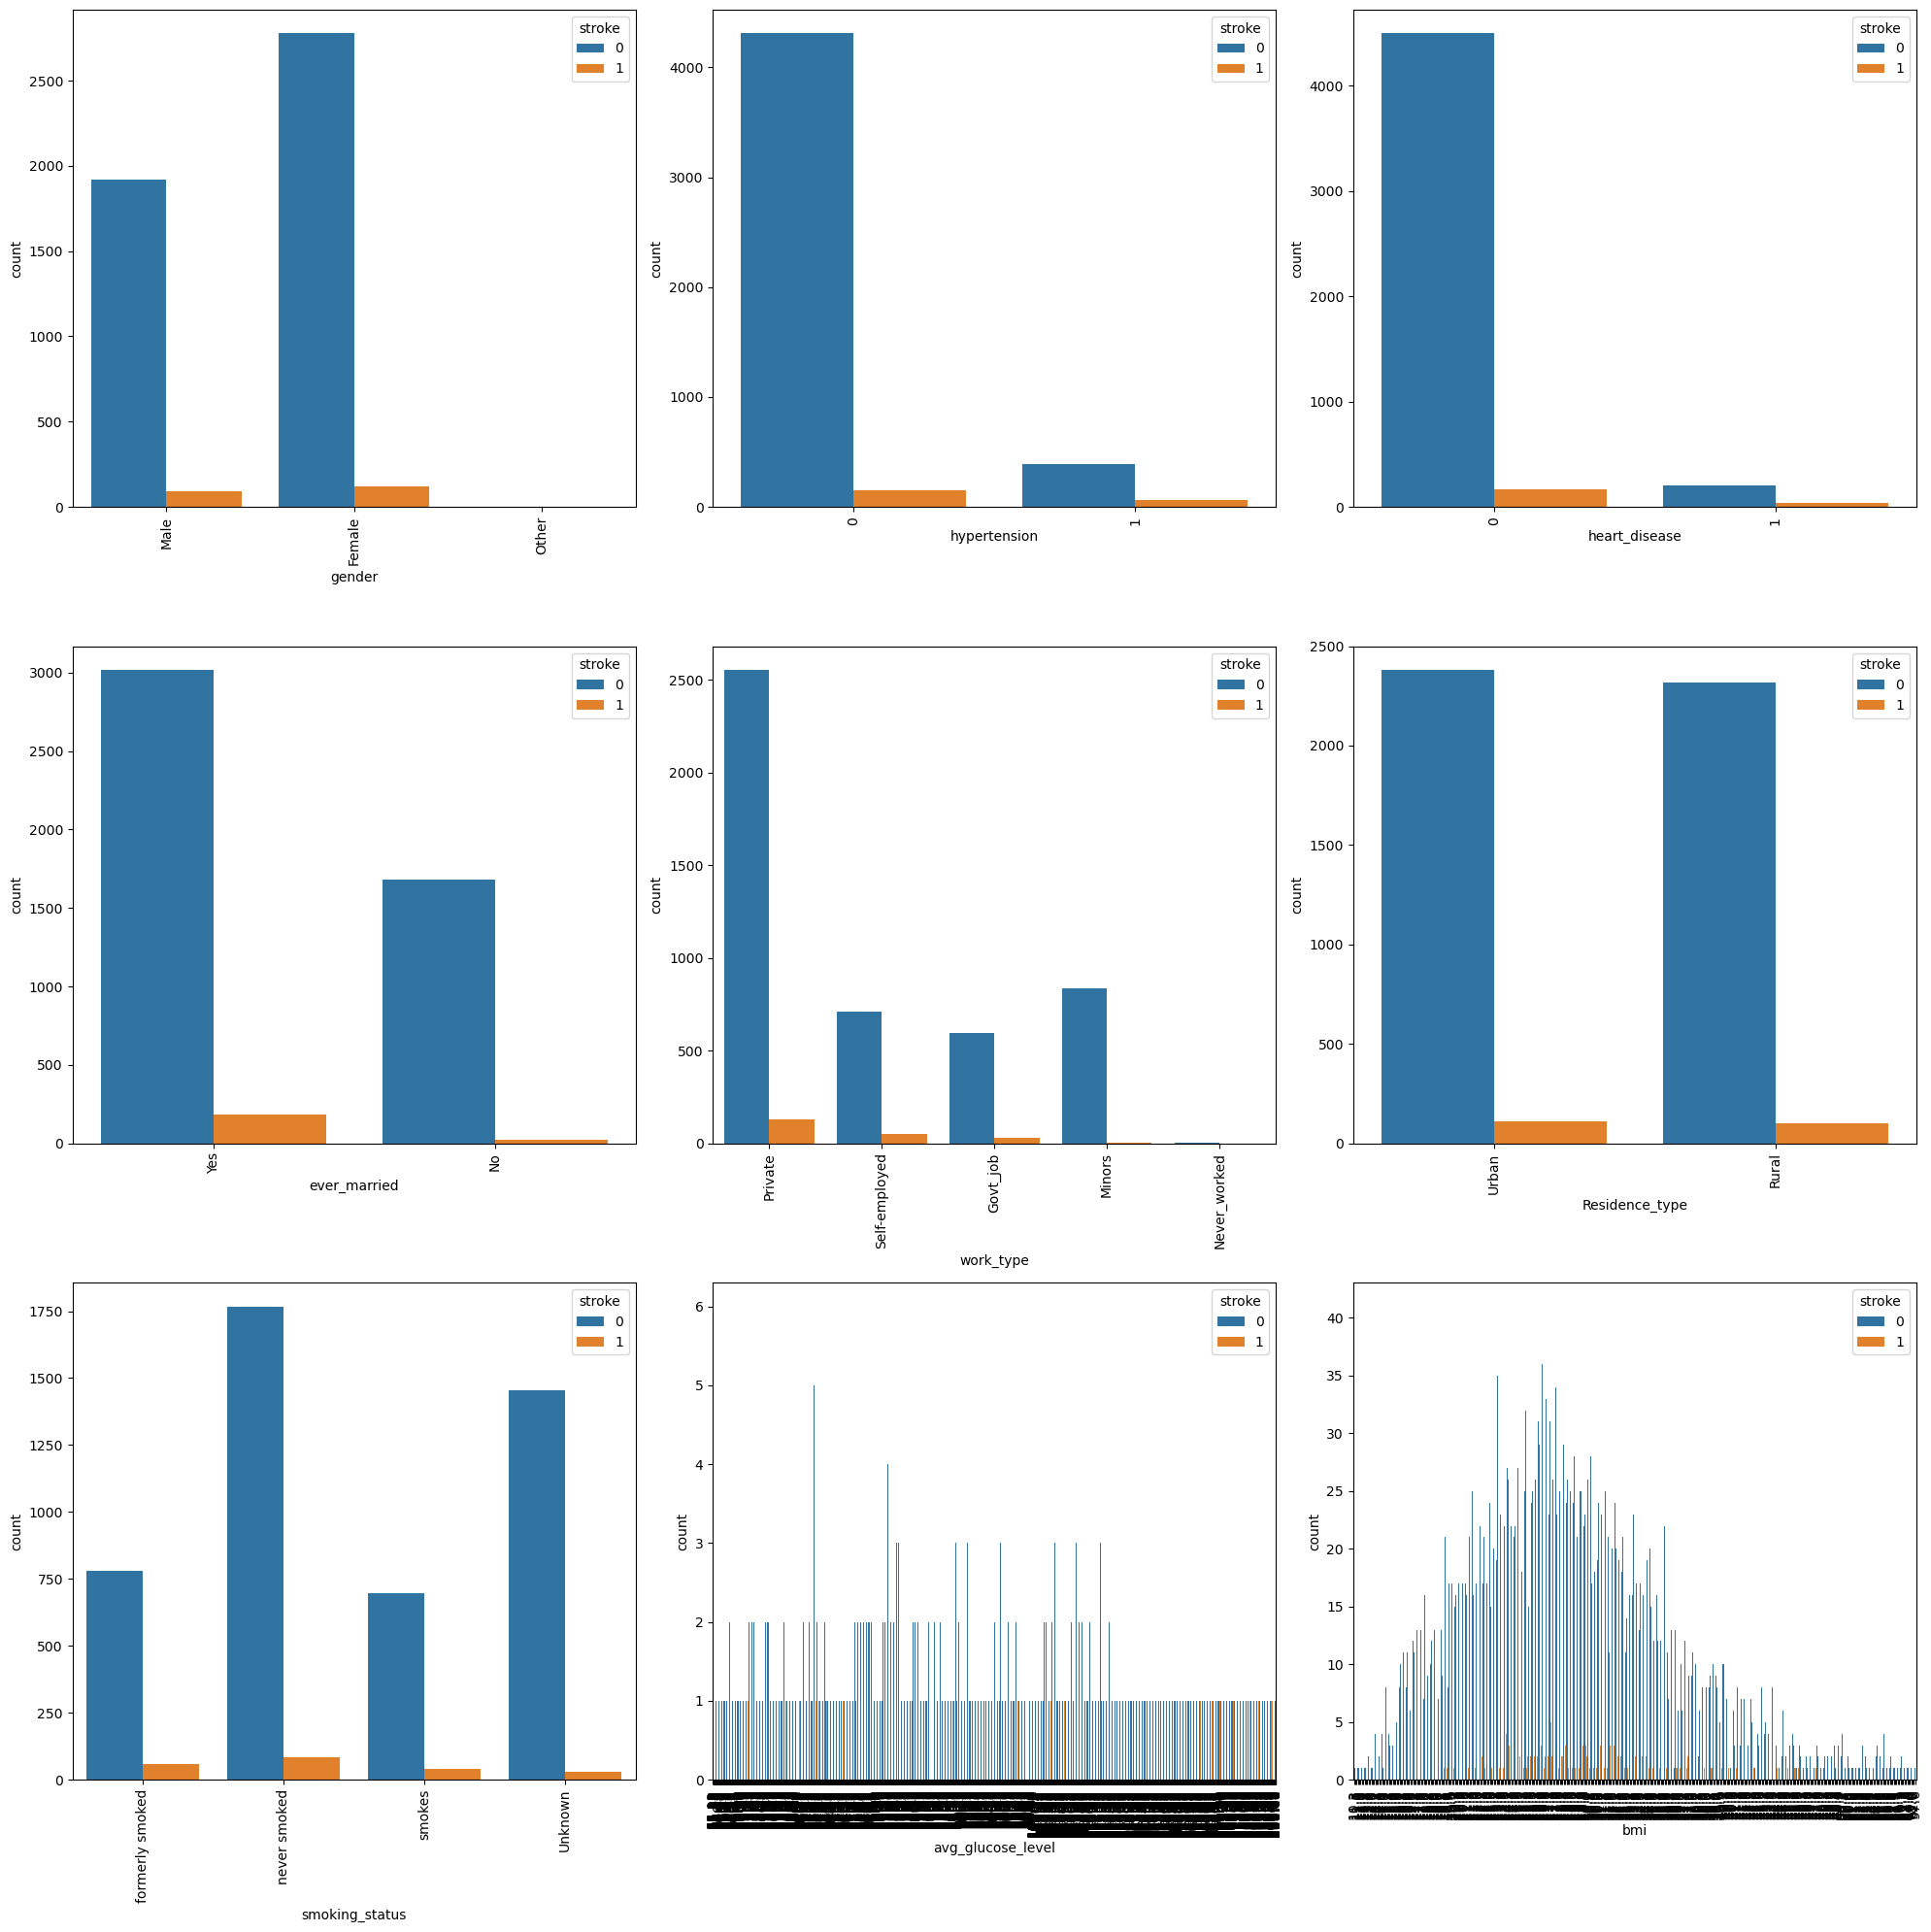

In [132]:
categorical_variables = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status',
                         'avg_glucose_level','bmi']
continuous_variables = ['age', 'avg_glucose_level', 'bmi']


# Plot the categorical variables against the target variable 'stroke'
fig, axs = plt.subplots(3, 3, figsize=(20, 20))

for var, subplot in zip(categorical_variables, axs.flatten()):
    sns.countplot(x=stroke[var], hue=stroke['stroke'], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

plt.tight_layout()
plt.show()

In [133]:
stroke = stroke.drop(['id'], axis=1)

KeyError: "['id'] not found in axis"

In [ ]:
fig = plt.figure(figsize=(8,4))
sns.distplot(stroke.avg_glucose_level, color="green", label="avg_glucose_level", kde= True)
plt.legend()

In [ ]:
fig = plt.figure(figsize=(8,4))
sns.distplot(stroke.bmi, color="violet", label="bmi", kde= True)
plt.legend()

In [ ]:
# BuPu

In [ ]:
colormap = plt.cm.BuGn ###  https://seaborn.pydata.org/tutorial/color_palettes.html 
#https://matplotlib.org/stable/users/explain/colors/colormaps.html   tab10, , rainbow, Oranges, reds,PuBuGn, BuGn
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(stroke.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

🔍 Interpretation of Results:
    
Here are some observations from the bivariate analysis with the categorical variables:

gender: Both males and females have a similar proportion of stroke cases, with males having slightly more. The Other category has no stroke cases, but this could be due to the very small sample size for this category. 

hypertension: Patients with hypertension have a higher proportion of stroke cases than those without hypertension. 

heart_disease: Patients with heart disease also have a higher proportion of stroke cases than those without heart disease.

ever_married: Those who have been married have a higher proportion of stroke cases than those who have not.

work_type: Patients who are self-employed or work in private jobs have a higher proportion of stroke cases compared to other work types.

Residence_type: The proportion of stroke cases is almost equal for both urban and rural residents.

smoking_status: The proportion of stroke cases is higher for patients who formerly smoked or currently smoke compared to those who never smoked. The stroke proportion for the 'Unknown' category is lower.